In [1]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28665 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28665 zstore(s)

	> 59 dcpp_init_year(s)

In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [4]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id','variable_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [5]:
cat = col.search(source_id=['GFDL-CM4'],experiment_id=['historical'], 
                 table_id='Omon', variable_id=['uo'], grid_label=['gn'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
16532,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN


In [6]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [7]:
dset_dict

{'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
 Coordinates:
   * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
   * time       (time) int64 0 708 1416 2148 ... 1442460 1443192 1443924 1444656
   * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
   * bnds       (bnds) float64 1.0 2.0
   * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
   * member_id  (member_id) <U8 'r1i1p1f1'
 Data variables:
     lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
     lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
     time_bnds  (time, bnds) float64 dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
     uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dset_dict.keys()

dict_keys(['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn'])

In [10]:
ds = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [11]:
ds.uo

<xarray.DataArray 'uo' (member_id: 1, time: 1980, lev: 35, y: 1080, x: 1440)>
dask.array<transpose, shape=(1, 1980, 35, 1080, 1440), dtype=float32, chunksize=(1, 1, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time       (time) int64 0 708 1416 2148 ... 1442460 1443192 1443924 1444656
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

In [12]:
data_sub = ds.isel(time=0).isel(lev=0).isel(member_id=-1)

In [13]:
data_sub.uo

<xarray.DataArray 'uo' (y: 1080, x: 1440)>
dask.array<getitem, shape=(1080, 1440), dtype=float32, chunksize=(1080, 1440), chunktype=numpy.ndarray>
Coordinates:
    lev        float64 2.5
    time       int64 0
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
    member_id  <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

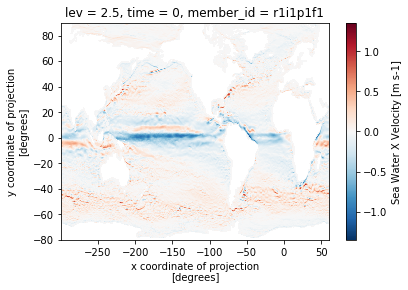

In [17]:
#data_sub.uo.sel(x=slice(0,30), y=slice(-80,-50)).plot()
data_sub.uo.plot()